In [1]:
from IntrinsicDisorder.intermediate import Intermediate
import IsoformAnalysis.FastaToDF as FastaToDF
import IsoformAnalysis.IsoformAnalyzer as IsoformAnalyzer
import IsoformAnalysis.ProteinMatcher as ProteinMatcher

### Generates interaction data


In [2]:
interaction_data = Intermediate(
    input=[
        "Data/BioPlex_293T_Network_10K_Dec_2019.tsv",
        "Data/BioPlex_HCT116_Network_5.5K_Dec_2019.tsv",
        "Data/Huttlin_BioPlex3_Table_S1.xlsb",
        "Data/uniprotkb_AND_reviewed_true_AND_model_o_2024_02_28.fasta",
    ]
)

### Loads ISO-File

In [3]:
iso_lib = FastaToDF.read_fasta("Data/UP000005640_9606_additional.fasta")

### MAP TO ISOFORM LIBRARY

In [4]:
data_293T = interaction_data.unique_293T
data_HCT116 = interaction_data.unique_HCT116
data_shared = interaction_data.shared
isoforms_293T, index_293T = IsoformAnalyzer.get_dataset_count(data_293T, iso_lib)
isoforms_HCT116, index_HCT116 = IsoformAnalyzer.get_dataset_count(data_HCT116, iso_lib)
isoforms_shared, _ = IsoformAnalyzer.get_dataset_count(data_shared, iso_lib)

### UNIQUE INTERACTIONS COMBINED

In [5]:
isoforms_uniqueppi_293T = ProteinMatcher.get_uniqueppi_isoforms(data_293T, isoforms_293T, isoforms_HCT116, index_293T)
isoforms_uniqueppi_HCT116 = ProteinMatcher.get_uniqueppi_isoforms(data_HCT116, isoforms_HCT116, isoforms_293T, index_HCT116)

index_uppi = IsoformAnalyzer.addition(isoforms_uniqueppi_293T, isoforms_uniqueppi_HCT116, None, "isoform")
proteins_uppi = IsoformAnalyzer.isoform_count(index_uppi)

### PLOTS ISOFORM DISTRIBUTION

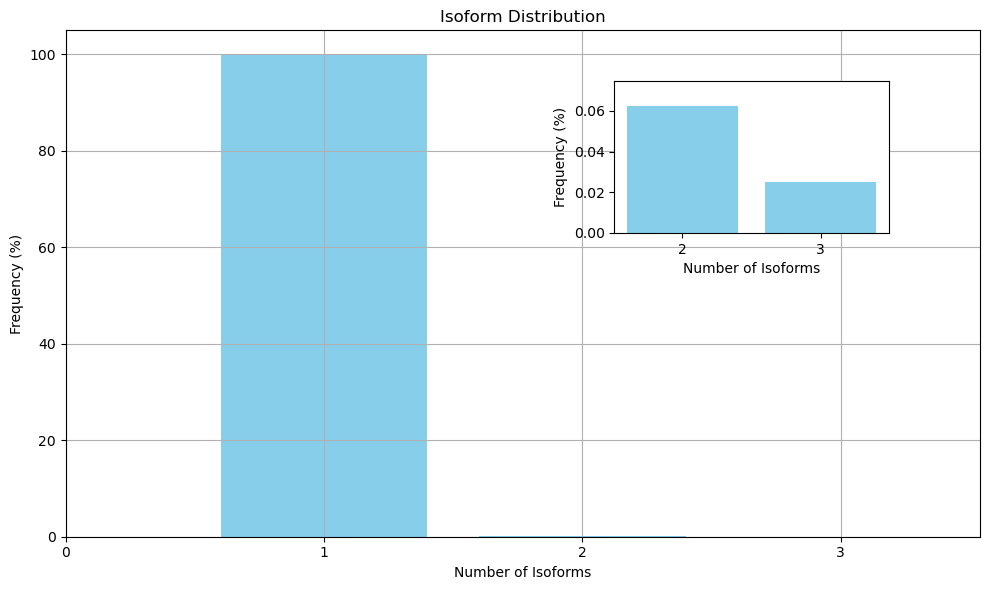

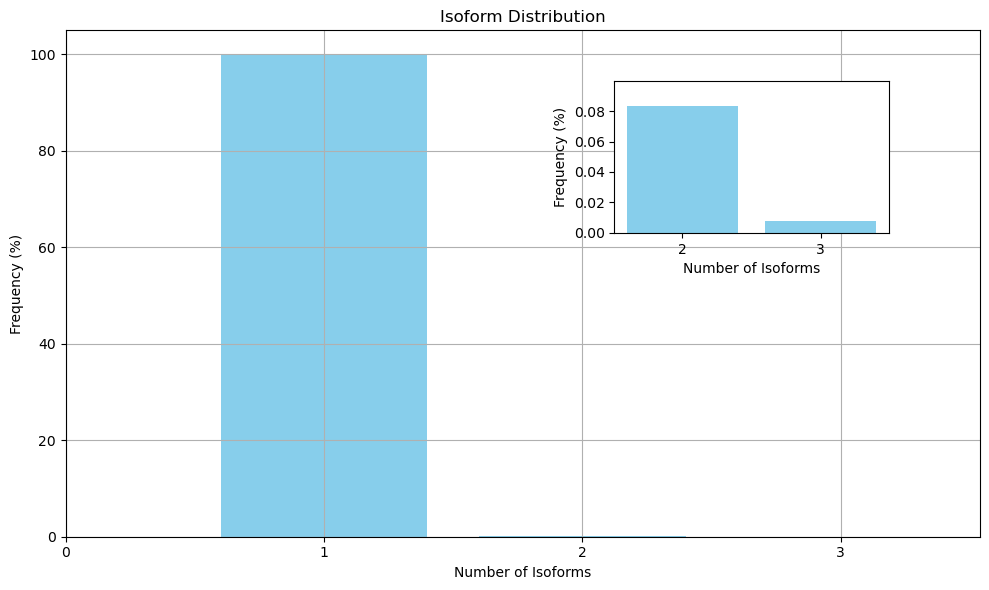

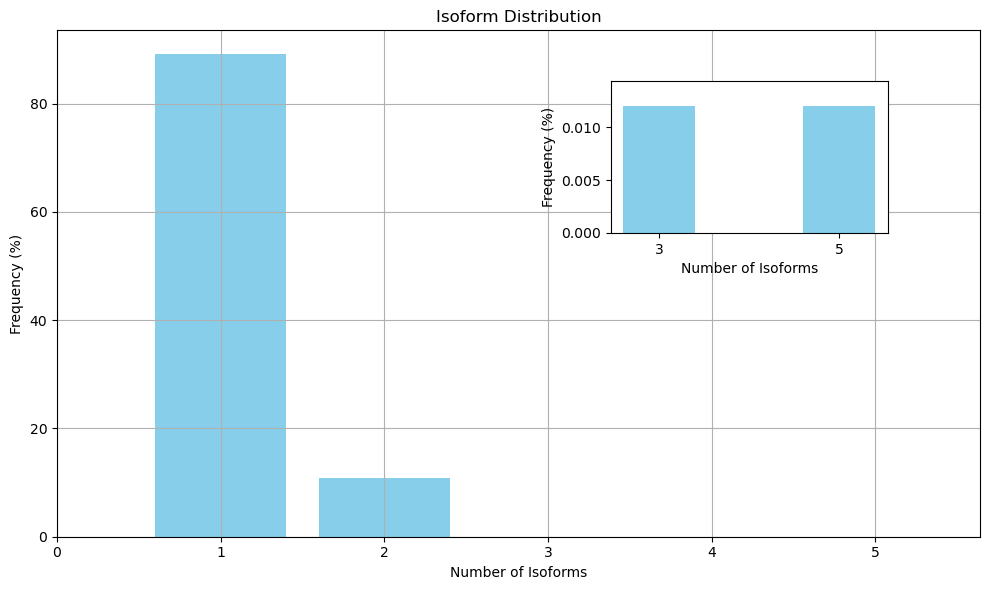

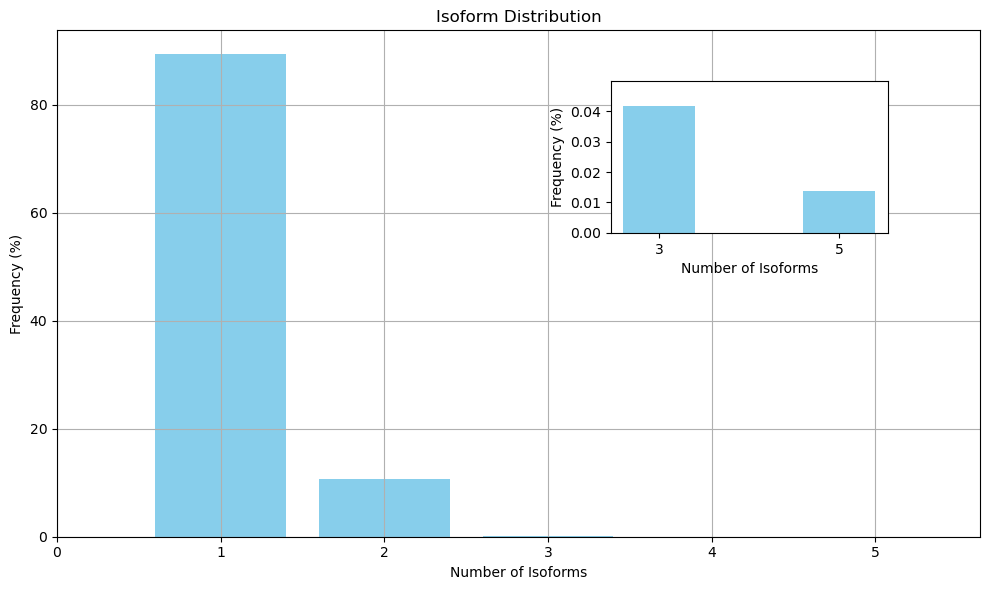

In [6]:
IsoformAnalyzer.isoform_distribution(isoforms_HCT116)
IsoformAnalyzer.isoform_distribution(isoforms_293T)
IsoformAnalyzer.isoform_distribution(isoforms_shared)
IsoformAnalyzer.isoform_distribution(proteins_uppi)